In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gubbi_level_3 = gpd.read_file('../Arecanut/LULC_Tumkur_Gubbi_Taluk (1)/LULC_Tumkur_Gubbi_Taluk_L5.shp')

In [81]:
gubbi_level_3[gubbi_level_3['LULC_Desc_']=='Agricultural land']['LULC_Desc1'].unique()

array(['Plantation', 'Crop land', 'Fallow land', 'Poultry Farm',
       'Aquaculture / Pisciculture'], dtype=object)

<Axes: >

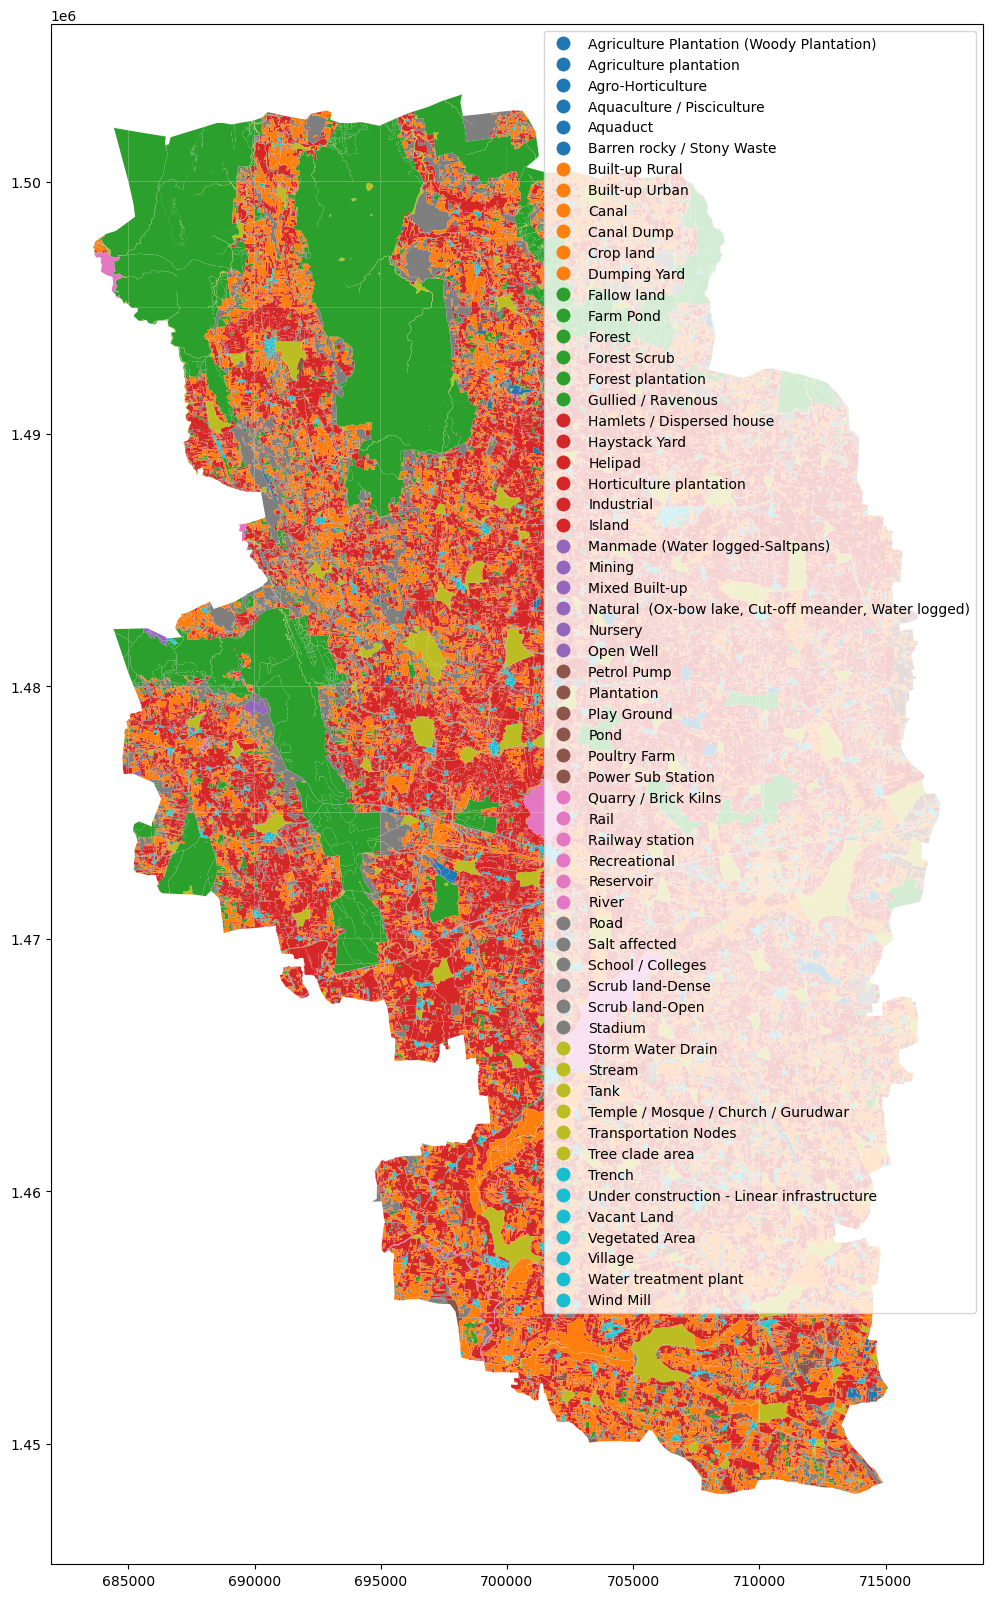

In [3]:
fig, ax = plt.subplots(figsize=(20,20))
gubbi_level_3.plot(column='LULC_Des_1',legend=True,ax=ax)

In [4]:
level_3clases = gubbi_level_3['LULC_Des_3'].unique()

In [5]:
arecanut_class = ['Arecanut','Coconut+Arecanut','Coconut+Arecanut+Banana','Arecanut+Banana','Coconut+Arecanut+Cashewnut']

In [6]:
gubbi_arecanut = gubbi_level_3[gubbi_level_3['LULC_Des_3'].isin(arecanut_class)].copy()

In [21]:
other_l3_clases = [element for element in level_3clases if element not in arecanut_class]
coconut = ['Coconut','Coconut+Banana']

In [23]:
coconut_l3_clases = gubbi_level_3[gubbi_level_3['LULC_Des_3'].isin(coconut)].copy()
mango_l3_clases = gubbi_level_3[gubbi_level_3['LULC_Des_3'].isin(['Mango'])].copy()

In [24]:
gubbi_arecanut['LC_category'] = 'Arecanut'
coconut_l3_clases['LC_category'] = 'Coconut'
mango_l3_clases['LC_category'] = 'Mango'

In [26]:
gubbi_level3_classes = pd.concat([gubbi_arecanut,coconut_l3_clases,mango_l3_clases])

In [41]:
level2_classes = ['Crop land','Fallow land','Plantation']

In [57]:
gubbi_level2_classes = gubbi_level_3[gubbi_level_3['LULC_Des_1'].isin(level2_classes)].copy()

In [62]:
gubbi_level2_classes['LC_category'] = gubbi_level2_classes['LULC_Des_1']

In [64]:
gubbi_l3_l2 = pd.concat([gubbi_level3_classes,gubbi_level2_classes])

In [101]:
gubbi_other_level1_classes = gubbi_level_3[~gubbi_level_3['LULC_Des_1'].isin(gubbi_l3_l2['LULC_Des_1'].unique())].copy()

In [102]:
gubbi_other_level1_classes['LC_category'] = gubbi_other_level1_classes['LULC_Desc_']

In [103]:
gubi_final_lulc = pd.concat([gubbi_other_level1_classes,gubbi_l3_l2],ignore_index=True)[['LC_category','geometry']]

<Axes: >

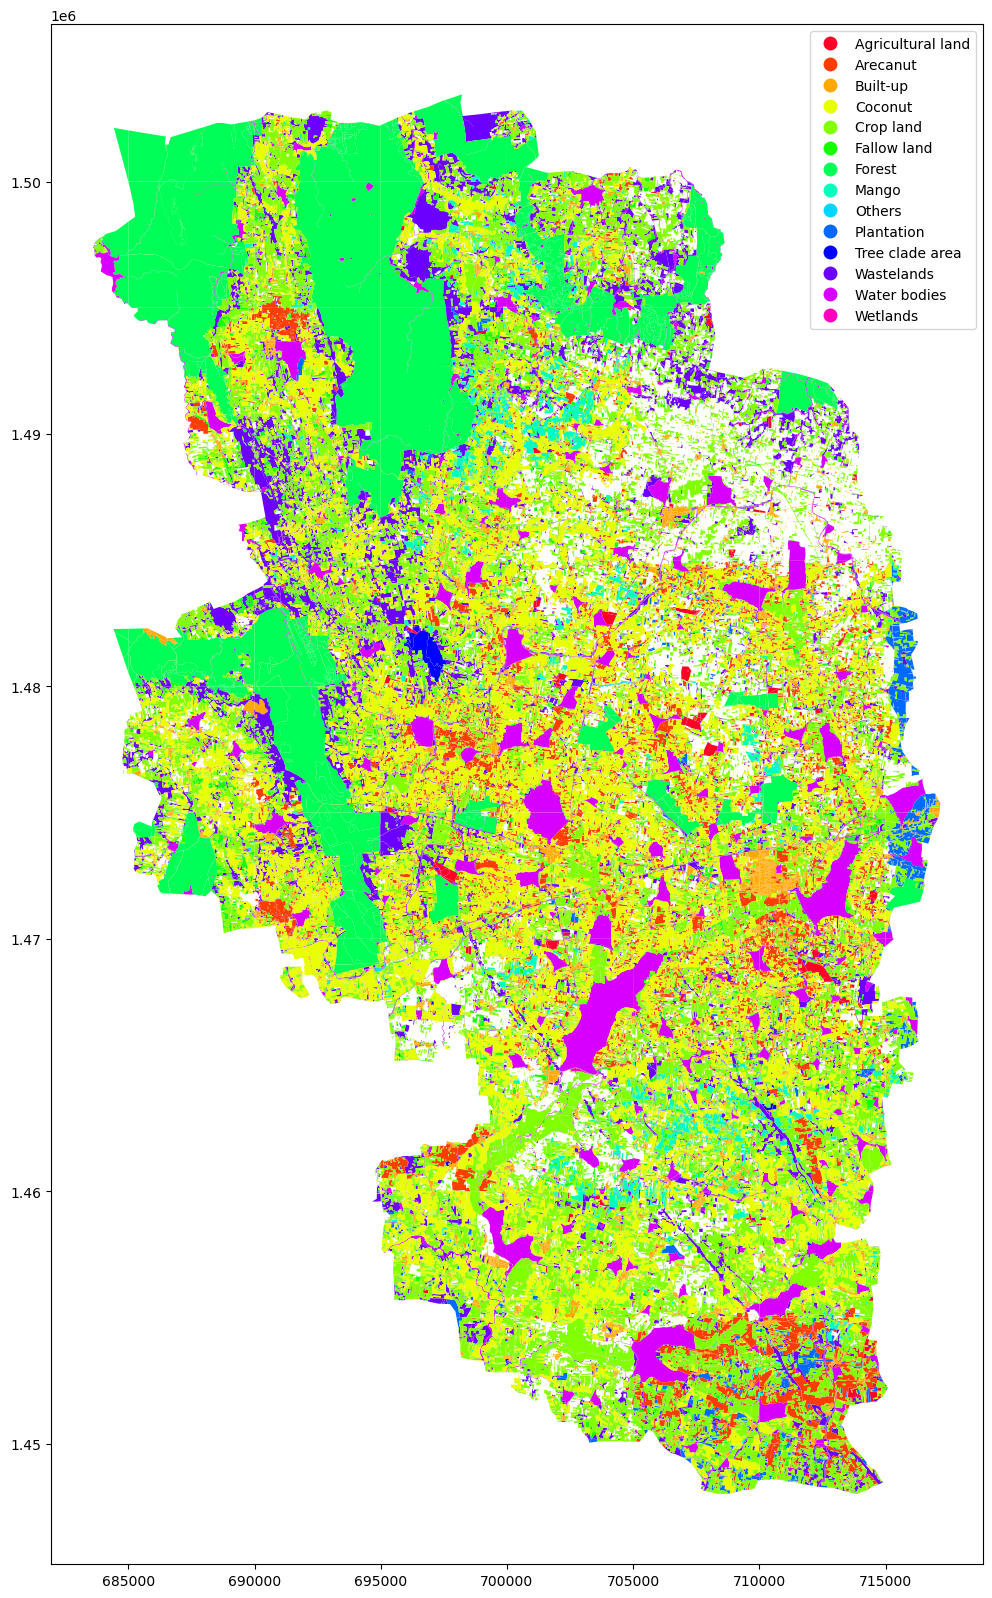

In [106]:
fig, ax = plt.subplots(figsize=(20,20))
gubi_final_lulc.plot(column='LC_category',legend=True,ax=ax,cmap='gist_rainbow')

In [107]:
gubi_final_lulc.to_file('../Arecanut/gubi_final_lulc/gubi_final_lulc.geojson')
gubi_final_lulc.to_file('../Arecanut/gubi_final_lulc/gubi_final_lulc.shp')

/var/folders/3c/04j8kfh5095g8fp48zx88dbh0000gn/T/ipykernel_34765/531312305.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gubi_final_lulc.to_file('../Arecanut/gubi_final_lulc/gubi_final_lulc.shp')
